Use a dataset to predict house prices (input: features like size, location; output: price). 
Implement and compare linear regression and decision tree regressors.

In [137]:
import sys
import shutil
import kagglehub
import numpy as np
import pandas as pd
from dotenv import load_dotenv
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [138]:
load_dotenv()

True

In [139]:
cwd = Path().cwd()
project_root = cwd.parent.parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))
    print("Done")

In [140]:
data_path = project_root / "data"

In [141]:
# # Download latest version
# cache_path = kagglehub.dataset_download("juhibhojani/house-price")

# for file in Path(cache_path).iterdir():
#     shutil.copy2(file, data_path/file.name)

In [142]:
path = data_path / "house_prices.csv"
data = pd.read_csv(
    filepath_or_buffer=str(path),
    encoding='latin-1',
    sep=",",
    thousands=',',
    na_values=['NA', 'N/A', 'null', 'NULL', '', ' ', 'None'],
    )

In [143]:
data.shape

(187531, 21)

In [144]:
data.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [145]:
data.columns

Index(['Index', 'Title', 'Description', 'Amount(in rupees)',
       'Price (in rupees)', 'location', 'Carpet Area', 'Status', 'Floor',
       'Transaction', 'Furnishing', 'facing', 'overlooking', 'Society',
       'Bathroom', 'Balcony', 'Car Parking', 'Ownership', 'Super Area',
       'Dimensions', 'Plot Area'],
      dtype='object')

In [146]:
data.isna().all()

Index                False
Title                False
Description          False
Amount(in rupees)    False
Price (in rupees)    False
location             False
Carpet Area          False
Status               False
Floor                False
Transaction          False
Furnishing           False
facing               False
overlooking          False
Society              False
Bathroom             False
Balcony              False
Car Parking          False
Ownership            False
Super Area           False
Dimensions            True
Plot Area             True
dtype: bool

In [147]:
data.isna().any()

Index                False
Title                False
Description           True
Amount(in rupees)    False
Price (in rupees)     True
location             False
Carpet Area           True
Status                True
Floor                 True
Transaction           True
Furnishing            True
facing                True
overlooking           True
Society               True
Bathroom              True
Balcony               True
Car Parking           True
Ownership             True
Super Area            True
Dimensions            True
Plot Area             True
dtype: bool

In [148]:
data.isna().sum()

Index                     0
Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64

In [149]:
(data.isna().sum()/data.shape[0])*100

Index                  0.000000
Title                  0.000000
Description            1.612000
Amount(in rupees)      0.000000
Price (in rupees)      9.419776
location               0.000000
Carpet Area           43.018488
Status                 0.327946
Floor                  3.773776
Transaction            0.044259
Furnishing             1.544811
facing                37.451408
overlooking           43.425354
Society               58.485264
Bathroom               0.441527
Balcony               26.094352
Car Parking           55.114621
Ownership             34.936624
Super Area            57.422506
Dimensions           100.000000
Plot Area            100.000000
dtype: float64

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [151]:
data = data.map(lambda x : x.strip() if isinstance(x, str) else x)

In [152]:
data.columns = data.columns.str.lower().str.replace(" ", "_").str.replace('[^a-z0-9_]', '')

In [153]:
data.columns

Index(['index', 'title', 'description', 'amount(in_rupees)',
       'price_(in_rupees)', 'location', 'carpet_area', 'status', 'floor',
       'transaction', 'furnishing', 'facing', 'overlooking', 'society',
       'bathroom', 'balcony', 'car_parking', 'ownership', 'super_area',
       'dimensions', 'plot_area'],
      dtype='object')

In [154]:
data.isnull().sum()

index                     0
title                     0
description            3023
amount(in_rupees)         0
price_(in_rupees)     17665
location                  0
carpet_area           80673
status                  615
floor                  7077
transaction              83
furnishing             2897
facing                70233
overlooking           81436
society              109678
bathroom                828
balcony               48935
car_parking          103357
ownership             65517
super_area           107685
dimensions           187531
plot_area            187531
dtype: int64

In [155]:
data.columns

Index(['index', 'title', 'description', 'amount(in_rupees)',
       'price_(in_rupees)', 'location', 'carpet_area', 'status', 'floor',
       'transaction', 'furnishing', 'facing', 'overlooking', 'society',
       'bathroom', 'balcony', 'car_parking', 'ownership', 'super_area',
       'dimensions', 'plot_area'],
      dtype='object')

First, I think i should remove the useless columns title, description, (dimensions, plot_area) these two cause these are all filled with nans

In [156]:
data.drop(columns=['title', 'description', 'dimensions', 'plot_area'], inplace=True)

In [157]:
data.shape

(187531, 17)

Here, since we are predicting the prices of the houses so i will drop all the rows that has missing data for prices

In [158]:
data.dropna(subset=["price_(in_rupees)"], inplace=True)

In [159]:
data.shape

(169866, 17)

In [160]:
missing_per = data.isna().mean() * 100

Checking the categorical columns

In [161]:
column_types = data.dtypes

In [162]:
column_types

index                  int64
amount(in_rupees)     object
price_(in_rupees)    float64
location              object
carpet_area           object
status                object
floor                 object
transaction           object
furnishing            object
facing                object
overlooking           object
society               object
bathroom              object
balcony               object
car_parking           object
ownership             object
super_area            object
dtype: object

In [163]:
# Location
u_location = pd.Series(data["location"].unique())
u_location

0             thane
1       navi-mumbai
2            nagpur
3            mumbai
4         ahmedabad
          ...      
76         varanasi
77       vijayawada
78    visakhapatnam
79        vrindavan
80         zirakpur
Length: 81, dtype: object

In [164]:
# Status
u_status = pd.Series(data["status"].unique())
u_status

0    Ready to Move
1              NaN
dtype: object

In [165]:
data.columns

Index(['index', 'amount(in_rupees)', 'price_(in_rupees)', 'location',
       'carpet_area', 'status', 'floor', 'transaction', 'furnishing', 'facing',
       'overlooking', 'society', 'bathroom', 'balcony', 'car_parking',
       'ownership', 'super_area'],
      dtype='object')

In [166]:
missing_per["status"].item()

0.3502760999846938

I think since the columns status only takes one value and it is in almost 99% of the data so, it has almost no variance so, I don't the model will learn anything useful from this. So, I am dropping it.

In [167]:
data.drop(columns=["status"], inplace=True)

In [168]:
# Furnishing
u_furnishing = pd.Series(data['furnishing'].unique())
u_furnishing

0       Unfurnished
1    Semi-Furnished
2         Furnished
3               NaN
dtype: object

In [169]:
missing_per["furnishing"].item()

1.2127206150730576

In [170]:
# facing
u_facing = pd.Series(data["facing"].unique())
u_facing

0             NaN
1            East
2            West
3    North - East
4           North
5    North - West
6           South
7     South -West
8    South - East
dtype: object

In [171]:
missing_per["facing"].item()

36.52997068277348

In [172]:
# overlooking
u_overlooking = pd.Series(data["overlooking"].unique())
u_overlooking

0                                NaN
1                        Garden/Park
2             Garden/Park, Main Road
3                          Main Road
4       Pool, Garden/Park, Main Road
5       Garden/Park, Pool, Main Road
6                  Garden/Park, Pool
7             Main Road, Garden/Park
8       Main Road, Garden/Park, Pool
9                  Pool, Garden/Park
10      Garden/Park, Main Road, Pool
11                              Pool
12                   Pool, Main Road
13      Main Road, Pool, Garden/Park
14      Pool, Main Road, Garden/Park
15          Main Road, Not Available
16                   Main Road, Pool
17        Garden/Park, Not Available
18    Pool, Main Road, Not Available
dtype: object

This one looks very interesting, It seems like this features can be broken into multiple features.

In [173]:
missing_per["overlooking"].item()

41.589252705073406

In [174]:
# ownership
u_ownership = pd.Series(data["ownership"].unique())
u_ownership

0                     NaN
1                Freehold
2    Co-operative Society
3       Power Of Attorney
4               Leasehold
dtype: object

In [175]:
missing_per["ownership"].item()

34.28408274757751

In [176]:
# super_area
u_super_area = pd.Series(data["super_area"].unique())
u_super_area

0             NaN
1        680 sqft
2        575 sqft
3        600 sqft
4       1165 sqft
          ...    
2893    147 sqyrd
2894    217 sqyrd
2895    2066 sqft
2896     406 sqft
2897    2332 sqft
Length: 2898, dtype: object

In [177]:
# data[['super_area_value', 'super_area_unit']] = data['super_area'].str.extract(r'(\d+\.?\d*)\s+([a-zA-Z]+)')

In [178]:
# data[['super_area_value', 'super_area_unit']]

It seems like this column has some messed up data that has to fixed also datatype has to be changed

In [179]:
missing_per["super_area"].item()

55.120506752381296

In [180]:
# car_parking
u_car_parking = pd.Series(data["car_parking"].unique())
u_car_parking

0              NaN
1           1 Open
2        1 Covered
3        2 Covered
4       66 Covered
          ...     
201    205 Covered
202       300 Open
203    11 Covered,
204       123 Open
205       702 Open
Length: 206, dtype: object

I think this column can also be better broken and well feed to the model

In [181]:
missing_per["car_parking"].item()

53.54220385480319

In [182]:
# society
u_society = pd.Series(data['society'].unique())
u_society

0       Srushti Siddhi Mangal Murti Complex
1                               Dosti Vihar
2                      Sunrise by Kalpataru
3               TenX Habitat Raymond Realty
4                              Virat Aangan
                       ...                 
9692             Sushma Chandigarh Infinium
9693                     Silver City Greens
9694                Sushma Crescent Phase 2
9695                  Nirmaan Royale Empire
9696                   Jaivee Radha Enclave
Length: 9697, dtype: object

In [183]:
missing_per["society"].item()

57.358741596317095

In [184]:
# bathroom
u_bathroom = pd.Series(data["bathroom"].unique())
u_bathroom

0        1
1        2
2        3
3        4
4        6
5      NaN
6        5
7        9
8        8
9     > 10
10       7
11      10
dtype: object

In [185]:
missing_per["bathroom"].item()

0.4438792930898473

In [186]:
# balcony
u_balcony = pd.Series(data["balcony"].unique())
u_balcony

0        2
1      NaN
2        1
3        3
4        4
5        6
6        5
7        7
8     > 10
9       10
10       8
11       9
dtype: object

In [187]:
missing_per["balcony"].item()

26.527969105059285

In [188]:
# transaction
u_transaction = pd.Series(data["transaction"].unique())
u_transaction

0          Resale
1    New Property
2           Other
3      Rent/Lease
4             NaN
dtype: object

In [189]:
missing_per["transaction"].item()

0.0035321959662322064

In [190]:
# carpet_area
u_carpet_area = pd.Series(data["carpet_area"].unique())
u_carpet_area

0        500 sqft
1        473 sqft
2        779 sqft
3        635 sqft
4             NaN
          ...    
2586    1797 sqft
2587    1634 sqft
2588    1709 sqft
2589    164 sqyrd
2590     136 sqft
Length: 2591, dtype: object

In [191]:
missing_per["carpet_area"].item()

44.87949324761871

In [192]:
data["amount(in_rupees)"]

0          42 Lac
1          98 Lac
2         1.40 Cr
4         1.60 Cr
5          45 Lac
           ...   
187526     63 Lac
187527     55 Lac
187528     76 Lac
187529     30 Lac
187530    1.18 Cr
Name: amount(in_rupees), Length: 169866, dtype: object

In [193]:
missing_per["amount(in_rupees)"].item()

0.0

In [194]:
data["price_(in_rupees)"].unique()

array([ 6000., 13799., 17500., ...,  2873.,  2663.,  2508.],
      shape=(10958,))

In [195]:
missing_per["price_(in_rupees)"].item()

0.0

I think we should remove the 'price_(in_rupees)' cause we will be be predicting Total amount and using price_(in_rupees) to predict total amount is like cheating.

In [196]:
data.drop(columns=["price_(in_rupees)"], inplace=True)

##### Ok, Till now we have done some data analysis and some data cleaning, Now we will do some more data cleaning and model building 

In [197]:
data.columns

Index(['index', 'amount(in_rupees)', 'location', 'carpet_area', 'floor',
       'transaction', 'furnishing', 'facing', 'overlooking', 'society',
       'bathroom', 'balcony', 'car_parking', 'ownership', 'super_area'],
      dtype='object')

I have a bit of confusion between carpet_area and super_area

In [198]:
u_super_area

0             NaN
1        680 sqft
2        575 sqft
3        600 sqft
4       1165 sqft
          ...    
2893    147 sqyrd
2894    217 sqyrd
2895    2066 sqft
2896     406 sqft
2897    2332 sqft
Length: 2898, dtype: object

In [199]:
u_carpet_area

0        500 sqft
1        473 sqft
2        779 sqft
3        635 sqft
4             NaN
          ...    
2586    1797 sqft
2587    1634 sqft
2588    1709 sqft
2589    164 sqyrd
2590     136 sqft
Length: 2591, dtype: object

So, the carpet_area and super_area are actually must be quite highlt correlated and since i want to predict the actual market value of the house i will keep super_area and drop carpet_area, but after checking there correlation, First let's do some more data cleaning.

Let's first fix carpet_area and super_area

In [200]:
# data[['super_area_value', 'super_area_unit']] = data['super_area'].str.extract(r'(\d+\.?\d*)\s+([a-zA-Z]+)')

In [201]:
data[['super_area_value', 'super_area_unit']] = data['super_area'].str.extract(r'(\d+\.?\d*)\s+([a-zA-Z]+)')

In [202]:
data[['carpet_area_value', 'carpet_area_unit']] = data['carpet_area'].str.extract(r'(\d+\.?\d*)\s+([a-zA-Z]+)')

In [203]:
data[['carpet_area_value', 'carpet_area_unit']].head()

,carpet_area_value,carpet_area_unit
0,500,sqft
1,473,sqft
2,779,sqft
4,635,sqft
5,NaN,NaN


In [204]:
data[['super_area_value', 'super_area_unit']].head()

,super_area_value,super_area_unit
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
4,NaN,NaN
5,680,sqft


In [205]:
data["carpet_area_unit"].unique()

array(['sqft', nan, 'sqm', 'sqyrd', 'acre', 'ground', 'bigha', 'marla',
       'kanal'], dtype=object)

In [206]:
data['super_area_unit'].unique()

array([nan, 'sqft', 'sqm', 'sqyrd', 'marla', 'ground', 'aankadam',
       'kanal', 'acre', 'cent'], dtype=object)

In [207]:
set(data["carpet_area_unit"].unique())  | set(data['super_area_unit'].unique())

{'aankadam',
 'acre',
 'bigha',
 'cent',
 'ground',
 'kanal',
 'marla',
 nan,
 'sqft',
 'sqm',
 'sqyrd'}

In [208]:
conversion_factors = {
    'sqft': 1,
    'sqm': 10.764,
    'sqyrd': 9,
    'acre': 43560,
    'cent': 435.6,
    'ground': 2400,
    'marla': 272.25,
    'kanal': 5445,
    'bigha': 27000,
    'aankadam': 72
}

In [209]:
for key, factor in conversion_factors.items():
    carpet_mask = (data["carpet_area_unit"] == key)
    data.loc[carpet_mask, "carpet_area_value"] = data.loc[carpet_mask, "carpet_area_value"].astype(float) * factor
    
    super_mask = (data["super_area_unit"] == key)
    data.loc[super_mask, "super_area_value"] = data.loc[super_mask, "super_area_value"].astype(float) * factor

In [210]:
data["carpet_area_value"].head()

0    500.0
1    473.0
2    779.0
4    635.0
5      NaN
Name: carpet_area_value, dtype: object

In [211]:
data["super_area_value"].head(20)

0        NaN
1        NaN
2        NaN
4        NaN
5      680.0
6        NaN
7      575.0
8      600.0
9        NaN
10       NaN
11    1165.0
12     844.0
13       NaN
14     650.0
15       NaN
16       NaN
17     540.0
18       NaN
19     520.0
20       NaN
Name: super_area_value, dtype: object

Done with the cleaning with carpet_area and super_area, Let's check the correlation

In [212]:
data.columns

Index(['index', 'amount(in_rupees)', 'location', 'carpet_area', 'floor',
       'transaction', 'furnishing', 'facing', 'overlooking', 'society',
       'bathroom', 'balcony', 'car_parking', 'ownership', 'super_area',
       'super_area_value', 'super_area_unit', 'carpet_area_value',
       'carpet_area_unit'],
      dtype='object')

In [213]:
data.drop(columns=['carpet_area', 'super_area_unit', 'carpet_area_unit', 'super_area'], inplace=True)

In [214]:
data[["super_area_value", "carpet_area_value"]].corr()

,super_area_value,carpet_area_value
super_area_value,1.0,NaN
carpet_area_value,NaN,1.0


In [215]:
data.columns

Index(['index', 'amount(in_rupees)', 'location', 'floor', 'transaction',
       'furnishing', 'facing', 'overlooking', 'society', 'bathroom', 'balcony',
       'car_parking', 'ownership', 'super_area_value', 'carpet_area_value'],
      dtype='object')

In [216]:
data.head()

,index,amount(in_rupees),location,floor,transaction,furnishing,facing,overlooking,society,bathroom,balcony,car_parking,ownership,super_area_value,carpet_area_value
0,0,42 Lac,thane,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,500.0
1,1,98 Lac,thane,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,473.0
2,2,1.40 Cr,thane,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,779.0
4,4,1.60 Cr,thane,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,635.0
5,5,45 Lac,thane,2 out of 7,Resale,Unfurnished,East,"Garden/Park, Main Road",Virat Aangan,1,1,NaN,Co-operative Society,680.0,NaN


Let's make the Our labels correct

In [217]:
data[["Amount_value", "Amount_unit"]] = data["amount(in_rupees)"].str.extract(r'(\d+\.?\d*)\s+([a-zA-Z]+)')

In [218]:
data["Amount_value"].unique()

array(['42', '98', '1.40', ..., '1.5', '24.4', '9.90'],
      shape=(1518,), dtype=object)

In [219]:
data["Amount_unit"].unique()

array(['Lac', 'Cr'], dtype=object)

##### Let's keep the unit of amount in lacs

In [220]:
data["Amount_value"] = data["Amount_value"].astype(float)
mask = (data["Amount_unit"] == 'Cr')
data.loc[mask, "Amount_value"] = data.loc[mask, "Amount_value"]*100

In [221]:
data[["Amount_value", "Amount_unit"]].head()

,Amount_value,Amount_unit
0,42.0,Lac
1,98.0,Lac
2,140.0,Cr
4,160.0,Cr
5,45.0,Lac


In [222]:
data.rename(columns={"Amount_value" : "Amount_in_lacs"}, inplace=True)

In [223]:
data.drop(columns=['Amount_unit'], inplace=True)

In [224]:
data.drop(columns=['amount(in_rupees)'], inplace=True)

In [225]:
data.shape

(169866, 15)

In [226]:
data.columns

Index(['index', 'location', 'floor', 'transaction', 'furnishing', 'facing',
       'overlooking', 'society', 'bathroom', 'balcony', 'car_parking',
       'ownership', 'super_area_value', 'carpet_area_value', 'Amount_in_lacs'],
      dtype='object')

In [227]:
missing_per = pd.DataFrame(missing_per)

In [228]:
missing_per

,0
index,0.000000
amount(in_rupees),0.000000
price_(in_rupees),0.000000
location,0.000000
carpet_area,44.879493
status,0.350276
floor,4.028469
transaction,0.003532
furnishing,1.212721
facing,36.529971


Features that have very minimal missing values are **Floor**, **Status**, **Transaction**, **Furnishing**, **Bathroom**, **Location**. Let's Try to build a model from a subset of these features.

In [229]:
u_floor = pd.Series(data["floor"]).unique()
u_floor

array(['10 out of 11', '3 out of 22', '10 out of 29', '20 out of 42',
       '2 out of 7', '4 out of 5', 'Ground out of 7', 'Ground out of 2',
       '3 out of 27', '6 out of 20', '16 out of 24', '8 out of 20',
       '18 out of 27', '2 out of 3', '10 out of 16', '5 out of 7',
       '20 out of 28', '3 out of 3', '3 out of 7', '15 out of 31',
       '2 out of 28', '27 out of 27', '5 out of 5', '3 out of 8',
       '11 out of 17', '9 out of 24', '16 out of 27', '14 out of 29',
       '12 out of 27', '1 out of 27', '2 out of 4', '16 out of 38',
       '3 out of 4', '2 out of 17', '12 out of 28', '3 out of 19',
       '6 out of 28', '1 out of 4', '7 out of 16', '2 out of 2',
       '1 out of 9', '7 out of 12', '10 out of 10', '4 out of 4',
       '6 out of 7', '14 out of 17', '21 out of 27', '5 out of 8',
       '7 out of 30', '6 out of 18', '14 out of 28', '3 out of 5',
       '2 out of 24', '1 out of 8', '2 out of 16', '7 out of 7',
       '1 out of 17', '20 out of 32', '10 out of 25', 

Ok, so floor is messed up we will have to do something about it.

In [230]:
u_status

0    Ready to Move
1              NaN
dtype: object

And we have already removed status feature from our dataset 😂

In [231]:
u_transaction

0          Resale
1    New Property
2           Other
3      Rent/Lease
4             NaN
dtype: object

Ok, so transaction could be our first feature for the model, Looks pretty straight forward.

In [232]:
u_furnishing

0       Unfurnished
1    Semi-Furnished
2         Furnished
3               NaN
dtype: object

Ok, this could be second going well, yay!!🥳 we got two

In [233]:
u_bathroom

0        1
1        2
2        3
3        4
4        6
5      NaN
6        5
7        9
8        8
9     > 10
10       7
11      10
dtype: object

This is the third and last, Keeping it simple for the fird model

In [234]:
data.columns

Index(['index', 'location', 'floor', 'transaction', 'furnishing', 'facing',
       'overlooking', 'society', 'bathroom', 'balcony', 'car_parking',
       'ownership', 'super_area_value', 'carpet_area_value', 'Amount_in_lacs'],
      dtype='object')

In [328]:
# keeping a copy of the dataset
data_copy = data.copy()

In [329]:
# let's delete all the missing data from these three columns.
data_copy.dropna(subset=["bathroom", "furnishing", "transaction"], inplace=True)

In [330]:
data_copy.shape

(167761, 15)

In [331]:
# how much rows have be lost😔.
data.shape[0] - data_copy.shape[0]

2105

In [332]:
X = data_copy[["bathroom", "furnishing", "transaction"]]
y = data_copy["Amount_in_lacs"]

In [333]:
X.head()

,bathroom,furnishing,transaction
0,1,Unfurnished,Resale
1,2,Semi-Furnished,Resale
2,2,Unfurnished,Resale
4,2,Unfurnished,Resale
5,1,Unfurnished,Resale


In [334]:
X.notna().all()

bathroom       True
furnishing     True
transaction    True
dtype: bool

In [335]:
# now we have to create dummies
X = pd.get_dummies(X, columns=["bathroom", "furnishing", "transaction"], drop_first=True)
X.head()

,bathroom_10,bathroom_2,bathroom_3,bathroom_4,bathroom_5,bathroom_6,bathroom_7,bathroom_8,bathroom_9,bathroom_> 10,furnishing_Semi-Furnished,furnishing_Unfurnished,transaction_Other,transaction_Rent/Lease,transaction_Resale
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True
4,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True
5,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True


yaa, X only has categorical features i know, which might we concerning, but anyway let's first build the model

In [336]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [337]:
X_train.shape, X_test.shape

((134208, 15), (33553, 15))

In [338]:
# fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [339]:
model.coef_

array([1877.55815886,   41.01724023,  113.94773311,  239.336975  ,
        589.88884964,  646.80615672,  906.46480547, 2140.27049753,
       2261.07191714, 1120.8546161 ,    6.46624142,    4.2668906 ,
         16.24635949,  -81.99259121,  -17.13677877])

In [340]:
y_train_pred = model.predict(X_train)

In [341]:
rmse_train = np.sqrt(mean_squared_error(y_pred=y_train_pred, y_true=y_train))
rmse_train.item()

414.29025620569934

In [342]:
r2_train = r2_score(y_pred=y_train_pred, y_true=y_train)
r2_train

0.05281852301680112

In [343]:
# performance on test set
y_test_pred = model.predict(X_test)

In [344]:
rmse_test = np.sqrt(mean_squared_error(y_pred=y_test_pred, y_true=y_test))
rmse_test.item()

294.52778358066337

In [345]:
r2_test = r2_score(y_pred=y_test_pred, y_true=y_test)
r2_test

0.08407689523919903

In [346]:
# let's make the model a bit better by adding more features.
missing_per

,0
index,0.000000
amount(in_rupees),0.000000
price_(in_rupees),0.000000
location,0.000000
carpet_area,44.879493
status,0.350276
floor,4.028469
transaction,0.003532
furnishing,1.212721
facing,36.529971


In [347]:
u_location

0             thane
1       navi-mumbai
2            nagpur
3            mumbai
4         ahmedabad
          ...      
76         varanasi
77       vijayawada
78    visakhapatnam
79        vrindavan
80         zirakpur
Length: 81, dtype: object

In [348]:
location_percentages = (data_copy["location"].value_counts()/len(data))*100

In [349]:
location_percentages.sort_values(ascending=False, inplace=True)

In [350]:
cum_sum_location_percentages = location_percentages.cumsum()

In [351]:
len(cum_sum_location_percentages[cum_sum_location_percentages < 97])

48

In [352]:
r_indxes = cum_sum_location_percentages[cum_sum_location_percentages > 97].index

In [353]:
r_indxes

Index(['nashik', 'trivandrum', 'thrissur', 'ernakulam', 'mysore', 'haridwar',
       'allahabad', 'durgapur', 'gwalior', 'vapi', 'ludhiana', 'indore',
       'udaipur', 'jabalpur', 'trichy', 'bhopal', 'rajahmundry', 'tirupati',
       'bhiwandi', 'vrindavan', 'jodhpur', 'belgaum', 'shimla', 'kozhikode',
       'udupi', 'satara', 'solapur', 'ahmadnagar', 'nellore', 'navsari',
       'pondicherry', 'palakkad', 'madurai'],
      dtype='object', name='location')

In [354]:
data_copy = data_copy[~data_copy["location"].isin(r_indxes)]

In [355]:
# how much data have we lost 😔
data.shape[0] - data_copy.shape[0]

5182

Now we have got one more feature location which is major for housing price prediction, so let's make another model

In [356]:
X = data_copy[["bathroom", "furnishing", "transaction", "location"]]
y = data_copy["Amount_in_lacs"]

In [357]:
X = pd.get_dummies(X, columns=["bathroom", "furnishing", "transaction", "location"], drop_first=True)

In [358]:
X.shape

(164684, 62)

In [359]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [360]:
X_train.shape, X_test.shape

((131747, 62), (32937, 62))

In [361]:
model_location = LinearRegression()
model_location.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [362]:
model_location.coef_

array([ 7.31275258e+02,  5.77258423e+01,  1.29968452e+02,  2.49727436e+02,
        6.00042745e+02,  6.25526730e+02,  7.22659626e+02,  2.11136367e+03,
        1.58945635e+03,  1.14390544e+03,  4.14971143e+00,  1.17626069e+00,
       -6.42804747e+01, -3.51005925e+01, -2.47585469e+01,  2.12090416e+01,
        3.70874167e+01,  4.02381714e+01,  4.92775856e+01,  6.74800594e+00,
        3.58780811e+01, -1.79707573e+01,  3.65176653e+01,  1.85200603e+01,
        9.96095849e+00, -3.06156474e+00,  1.78404690e+01,  6.31315344e+01,
        1.04277278e+01,  2.12113514e+00,  6.76277574e+01,  2.72687191e+01,
        7.50804980e+01, -1.08394914e+01,  1.90701212e+01,  5.62061678e+01,
        3.06764747e+01,  3.88546612e+00,  5.21871947e+01,  1.64511507e+01,
        1.35317583e+01, -5.35528270e+00,  2.66148954e+02,  1.17269044e+01,
        8.69705361e+01,  1.04477200e+02,  3.05787426e+01,  3.52140526e+01,
       -1.57715196e+01,  4.29659888e+01,  5.54092269e+01,  1.50665394e+02,
        2.21068629e+01,  

In [363]:
y_train_pred = model_location.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_pred=y_train_pred, y_true=y_train))
r2_train = r2_score(y_pred=y_train_pred, y_true=y_train)
print(f"RMSE(train) Error: {rmse_train}\nr2_score(train): {r2_train}")

RMSE(train) Error: 437.946794259558
r2_score(train): 0.054203703225683464


In [364]:
# let's add area
missing_per

,0
index,0.000000
amount(in_rupees),0.000000
price_(in_rupees),0.000000
location,0.000000
carpet_area,44.879493
status,0.350276
floor,4.028469
transaction,0.003532
furnishing,1.212721
facing,36.529971


In [365]:
# Let's add area too
data[data["carpet_area_value"].isna() & data["super_area_value"].isna()]

,index,location,floor,transaction,furnishing,facing,overlooking,society,bathroom,balcony,car_parking,ownership,super_area_value,carpet_area_value,Amount_in_lacs


In [366]:
# let's combine carpet_area and super_area using loading factor.
data_copy[data_copy["carpet_area_value"].isna() & data_copy["super_area_value"].isna()]

,index,location,floor,transaction,furnishing,facing,overlooking,society,bathroom,balcony,car_parking,ownership,super_area_value,carpet_area_value,Amount_in_lacs


In [367]:
factor = 1.3
data_copy["Area"] = data_copy["super_area_value"]
data_copy["Area"] = data_copy["Area"].fillna(data_copy["carpet_area_value"]*factor)

C:\Users\BIT\AppData\Local\Temp\ipykernel_13484\2270910782.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy["Area"] = data_copy["Area"].fillna(data_copy["carpet_area_value"]*factor)


In [368]:
data_copy["Area"].notna().all()

np.True_

In [369]:
# Let's build the model with the area
data_copy.shape

(164684, 16)

In [370]:
X = data_copy[["bathroom", "furnishing", "transaction", "location", "Area"]]
y = data_copy["Amount_in_lacs"]

In [371]:
X.notna().all().all()

np.True_

In [372]:
X = pd.get_dummies(X, columns=["bathroom", "furnishing", "transaction", "location"], drop_first=True)

In [373]:
X.shape

(164684, 63)

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train.shape, X_test.shape

((131747, 63), (32937, 63))

In [375]:
model_area = LinearRegression()
model_area.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [376]:
model_area.coef_

array([-7.11309786e-07,  7.31280233e+02,  5.77279286e+01,  1.29971217e+02,
        2.49731044e+02,  6.00047055e+02,  6.25530330e+02,  7.22660976e+02,
        2.11136891e+03,  1.58946042e+03,  1.14390926e+03,  4.15238389e+00,
        1.17749549e+00, -6.42830271e+01, -3.51004904e+01, -2.47571340e+01,
        2.12084575e+01,  3.70875194e+01,  4.02382538e+01,  4.92765280e+01,
        6.74734383e+00,  3.58776764e+01, -1.79716482e+01,  3.65166313e+01,
        1.85191814e+01,  9.96037494e+00, -3.06235136e+00,  1.78398036e+01,
        6.31316054e+01,  1.04380786e+01,  2.12115417e+00,  6.76267966e+01,
        2.72698650e+01,  7.50800632e+01, -1.08401576e+01,  1.90696907e+01,
        5.62060868e+01,  3.06760689e+01,  3.88464273e+00,  5.21907477e+01,
        1.64505675e+01,  1.35313729e+01, -5.35632109e+00,  2.66148360e+02,
        1.17264242e+01,  8.69702036e+01,  1.04476534e+02,  3.05775581e+01,
        3.52141937e+01, -1.57722091e+01,  4.29655730e+01,  5.54088911e+01,
        1.50746754e+02,  

In [377]:
y_train_pred = model_area.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_pred=y_train_pred, y_true=y_train))
r2_train = r2_score(y_pred=y_train_pred, y_true=y_train)
print(f"RMSE(train) Error: {rmse_train}\nr2_score(train): {r2_train}")

RMSE(train) Error: 437.94673924516206
r2_score(train): 0.05420394084545532


In [378]:
data_copy["Area"]

0          650.0
1          614.9
2         1012.7
4          825.5
5          680.0
           ...  
187526    1953.0
187527    1680.0
187528    1625.0
187529     709.0
187530    1915.0
Name: Area, Length: 164684, dtype: float64

In [379]:
X_train["Area"]

10975     1205.1
182956     910.0
182806    1250.0
166720    1180.0
58844     3065.4
           ...  
167198     650.0
170979    1750.0
59894     3065.4
53736      780.0
153666    1200.0
Name: Area, Length: 131747, dtype: float64

In [380]:
coef = dict(zip(model_area.feature_names_in_, model_area.coef_))

In [381]:
model_area.coef_

array([-7.11309786e-07,  7.31280233e+02,  5.77279286e+01,  1.29971217e+02,
        2.49731044e+02,  6.00047055e+02,  6.25530330e+02,  7.22660976e+02,
        2.11136891e+03,  1.58946042e+03,  1.14390926e+03,  4.15238389e+00,
        1.17749549e+00, -6.42830271e+01, -3.51004904e+01, -2.47571340e+01,
        2.12084575e+01,  3.70875194e+01,  4.02382538e+01,  4.92765280e+01,
        6.74734383e+00,  3.58776764e+01, -1.79716482e+01,  3.65166313e+01,
        1.85191814e+01,  9.96037494e+00, -3.06235136e+00,  1.78398036e+01,
        6.31316054e+01,  1.04380786e+01,  2.12115417e+00,  6.76267966e+01,
        2.72698650e+01,  7.50800632e+01, -1.08401576e+01,  1.90696907e+01,
        5.62060868e+01,  3.06760689e+01,  3.88464273e+00,  5.21907477e+01,
        1.64505675e+01,  1.35313729e+01, -5.35632109e+00,  2.66148360e+02,
        1.17264242e+01,  8.69702036e+01,  1.04476534e+02,  3.05775581e+01,
        3.52141937e+01, -1.57722091e+01,  4.29655730e+01,  5.54088911e+01,
        1.50746754e+02,  

In [382]:
coef["Area"]

np.float64(-7.113097862350332e-07)

In [393]:
data_copy["Area"].min(), data_copy["Area"].max()

(np.float64(573.0), np.float64(4675.0))

(array([19947., 51749., 32380., 25798.,  8731.,  3498.,  2911.,   889.,
          384.,   218.]),
 array([ 573. ,  983.2, 1393.4, 1803.6, 2213.8, 2624. , 3034.2, 3444.4,
        3854.6, 4264.8, 4675. ]),
 <BarContainer object of 10 artists>)

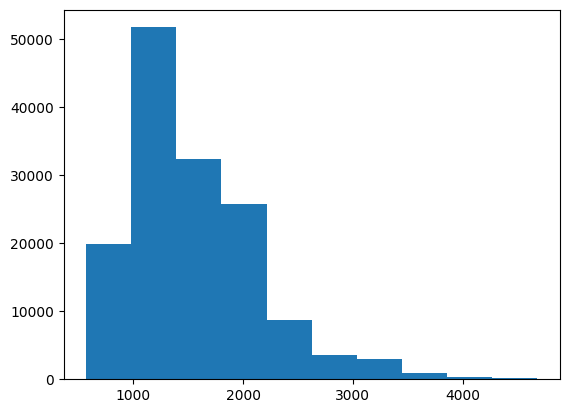

In [394]:
plt.hist(data_copy["Area"].values)

In [308]:
data_copy["Area"].describe()

count    1.646840e+05
mean     2.789658e+03
std      2.761009e+05
min      0.000000e+00
25%      1.050000e+03
50%      1.342000e+03
75%      1.850000e+03
max      8.494200e+07
Name: Area, dtype: float64

In [385]:
q_hi = data_copy["Area"].quantile(0.99)
q_lo = data_copy["Area"].quantile(0.05)
q_lo, q_hi

(np.float64(572.0), np.float64(4680.0))

In [386]:
q_hi_amount = data_copy["Amount_in_lacs"].quantile(0.99)
q_lo_amount = data_copy["Amount_in_lacs"].quantile(0.05)
q_lo_amount, q_hi_amount

(np.float64(23.0), np.float64(700.0))

In [392]:
data_copy = data_copy[(data_copy["Area"] > q_lo) & (data_copy["Area"] < q_hi)]

In [388]:
data_copy = data_copy[(data_copy["Amount_in_lacs"] > q_lo_amount) & (data_copy["Amount_in_lacs"] < q_hi_amount)]

(array([82777., 30219., 16356., 10799.,  2482.,   647.,  1768.,   534.,
          821.,   102.]),
 array([ 23.2 ,  90.78, 158.36, 225.94, 293.52, 361.1 , 428.68, 496.26,
        563.84, 631.42, 699.  ]),
 <BarContainer object of 10 artists>)

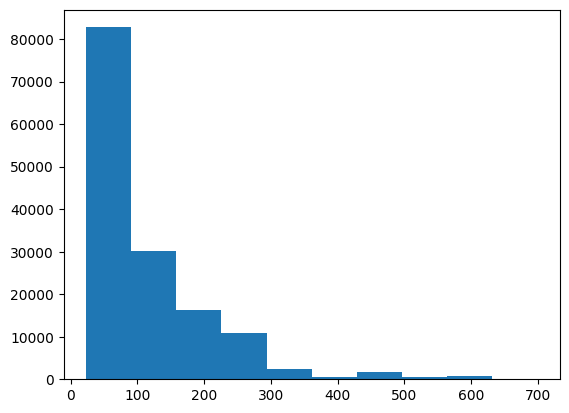

In [395]:
plt.hist(data_copy["Amount_in_lacs"])

In [397]:
data_copy[["Amount_in_lacs", "Area"]].corr()

,Amount_in_lacs,Area
Amount_in_lacs,1.000000,0.671033
Area,0.671033,1.000000


In [398]:
X = data_copy[["bathroom", "furnishing", "transaction", "location", "Area"]]
y = data_copy["Amount_in_lacs"]

In [399]:
X.notna().all().all()

np.True_

In [400]:
X = pd.get_dummies(X, columns=["bathroom", "furnishing", "transaction", "location"], drop_first=True)

In [401]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [402]:
model_area = LinearRegression()
model_area.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [403]:
y_train_pred = model_area.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_pred=y_train_pred, y_true=y_train))
r2_train = r2_score(y_pred=y_train_pred, y_true=y_train)
print(f"RMSE(train) Error: {rmse_train}\nr2_score(train): {r2_train}")

RMSE(train) Error: 56.83054035090778
r2_score(train): 0.6318585101532896


In [404]:
y_test_pred = model_area.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_pred=y_test_pred, y_true=y_test))
r2_test = r2_score(y_pred=y_test_pred, y_true=y_test)
print(f"RMSE(test) Error: {rmse_test}\nr2_score(test): {r2_test}")

RMSE(test) Error: 56.43055271598374
r2_score(test): 0.6335664846353717
